#### Processus de diqgnostic de notre jeu de données

In [34]:
##chargeons les bibliothèques utiles aux differents travaux
import pandas as pd #elle servira à charger nos donnée et effectuer des traveaux sur notre dataframe
import numpy as np #Necessaire pour les calcul sur les données tabulaires
import matplotlib.pyplot as plt #pour nos visualisations 
import missingno as mso #visualisation des valeurs manquantes 
from fuzzywuzzy import process #detection des erreur typographique 
import re #pour les gestion des erreurs liées au formatages des variables 
import seaborn as sns

In [304]:
pd.set_option("display.max_columns",None)

#### I- chargement du jeu de données dans un dataframe et premières exploration 

In [191]:
#chargement du dataset 
df=pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [6]:
#Qffichons les 10 premières lignes de notre dataframe
print(24*"*"+" Appercu des 10 premières lignes du jeu de données"+24*" *"+"\n")
df.head(10)

************************ Appercu des 10 premières lignes du jeu de données * * * * * * * * * * * * * * * * * * * * * * * *



,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
7,220314085,07/22/2022 12:00:00 AM,05/12/2020 12:00:00 AM,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537
8,231309864,04/28/2023 12:00:00 AM,12/09/2020 12:00:00 AM,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521
9,211904005,12/31/2020 12:00:00 AM,12/31/2020 12:00:00 AM,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535


### II Inspection structurelle 

In [9]:
#Affichons les dimensions de notre df 
df.shape

(982638, 28)

Notre jeu de données contient 982638 enregistrements en rélation avec 28 variables donc les noms 
seront donnés dans la cellule suivante 

In [14]:
#Affichons le type de chacune de nos variables grâce la fonction .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  float64
 17  Weapon Des

Structure du jeu de données 
-Nombre total de lignes : 982 638
-Nombre de colonnes : 28
-Taille mémoire sensiblement égale à 210Mo
-Chaque ligne correspond à un incident criminel identifié par DR_NO

In [17]:
#Classons nos variables par type 
print(24*"*"+" Affichons le nombre de Variables selon leur type "+24*"*")
variables_numeric=df.select_dtypes(include=[np.number]).columns 
variables_categorielle=df.select_dtypes(include=["object","category"]).columns
date_columns=df.select_dtypes(include=["datetime64"]).columns 

print(f"Variables Numériques: {len(variables_numeric)}")
print(f"Variables Catégorielles: {len(variables_categorielle)}")
print(f"Variable de type date: {len(date_columns)}")
print(94*"*")




************************ Affichons le nombre de Variables selon leur type ************************
Variables Numériques: 15
Variables Catégorielles: 13
Variable de type date: 0
**********************************************************************************************


In [19]:
#Affichons les variables par type 
int_variables = df.select_dtypes(include=["int64"]).columns
float_variables=df.select_dtypes(include=["float64"]).columns
variables_categorielle=df.select_dtypes(include=["object","category"]).columns
print(24*"*"+" Variables de types entier "+70*"*")
print(f"Variables de types entier: {", ".join(int_variables)}")
print(f"Nombre de variables entière: {len(int_variables)}\n")
print(24*"*"+" Variables de types float "+70*"*")
print(f"Variables de types floatant: {", ".join(float_variables)}")
print(f"Nombre de Variables Float: {len(float_variables)}\n")
print(24*"*"+" Variables de types Objet "+70*"*")
print(f"Variables Catégorielles: {", ".join(variables_categorielle)}")
print(f"Nombre de Variables Catégorielles: {len(variables_categorielle)}")


************************ Variables de types entier **********************************************************************
Variables de types entier: DR_NO, TIME OCC, AREA, Rpt Dist No, Part 1-2, Crm Cd, Vict Age
Nombre de variables entière: 7

************************ Variables de types float **********************************************************************
Variables de types floatant: Premis Cd, Weapon Used Cd, Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4, LAT, LON
Nombre de Variables Float: 8

************************ Variables de types Objet **********************************************************************
Variables Catégorielles: Date Rptd, DATE OCC, AREA NAME, Crm Cd Desc, Mocodes, Vict Sex, Vict Descent, Premis Desc, Weapon Desc, Status, Status Desc, LOCATION, Cross Street
Nombre de Variables Catégorielles: 13


### III Erreurs typographiques 

In [22]:
#Affichons les colonnes représentant des date et observons leurs types 
print(24*"*"+ "Affichons les colonnes représentant des dates et leurs types"+24*"*")
for col in df.columns:
    if "date" in col.lower():
        print(f"{col} type: {df[col].dtypes}")
print(94*"*")

************************Affichons les colonnes représentant des dates et leurs types************************
Date Rptd type: object
DATE OCC type: object
**********************************************************************************************


In [24]:
#Affichons les colonnes représentant le temps et eventuellement leur types 
print(24*"*"+ "Affichons les colonnes représentant le time et leurs types"+24*"*")
for col in df.columns:
    if "time" in col.lower():
        print(f"{col} type: {df[col].dtypes}")
print(94*"*")

************************Affichons les colonnes représentant le time et leurs types************************
TIME OCC type: int64
**********************************************************************************************


In [179]:
#Verification de saisie des entrées dans les variables Area name et location 
variable_cat=["AREA NAME","Vict Sex"]
verification={}
for var in variable_cat:
    verification[var]=df[var].value_counts()
for v in verification.values():
    print(v)

AREA NAME
Central        67774
77th Street    60865
Pacific        57810
Southwest      55978
Hollywood      51324
N Hollywood    49978
Southeast      49119
Olympic        49023
Newton         48268
Wilshire       47090
Rampart        45818
West LA        44673
Northeast      41897
Van Nuys       41888
West Valley    41319
Devonshire     40840
Harbor         40466
Topanga        40430
Mission        39404
Hollenbeck     36119
Foothill       32555
Name: count, dtype: int64
Vict Sex
M    396769
F    352750
X     94561
H       112
-         1
Name: count, dtype: int64


il n'existe pas de probleme de saisie dans ces colonnes 

### IV Valeurs manquantes 

### A- Affichons les valeurs manquantes par colonnes et leurs pourcentages

In [40]:
missing_value=pd.DataFrame(
    {"Variables":df.isna().sum().index,
    "Nb_MissingValue": df.isna().sum().values,
    "Frequence Relative":df.isna().sum().values*(100/len(df)),
    }
)
#missing_value=missing_value
print(24*"*"+" Affichons les variables ayant au moins une variable manquante "+24*"*" +"\n")
missing=missing_value[missing_value["Nb_MissingValue"]>0].sort_values(by="Frequence Relative",ascending=False).reset_index(drop=True)
print(missing)


************************ Affichons les variables ayant au moins une variable manquante ************************

         Variables  Nb_MissingValue  Frequence Relative
0         Crm Cd 4           982574           99.993487
1         Crm Cd 3           980327           99.764817
2         Crm Cd 2           913763           92.990806
3     Cross Street           830789           84.546802
4   Weapon Used Cd           656471           66.807003
5      Weapon Desc           656471           66.807003
6          Mocodes           145262           14.782860
7     Vict Descent           138456           14.090235
8         Vict Sex           138445           14.089115
9      Premis Desc              585            0.059534
10       Premis Cd               14            0.001425
11        Crm Cd 1               11            0.001119
12          Status                1            0.000102


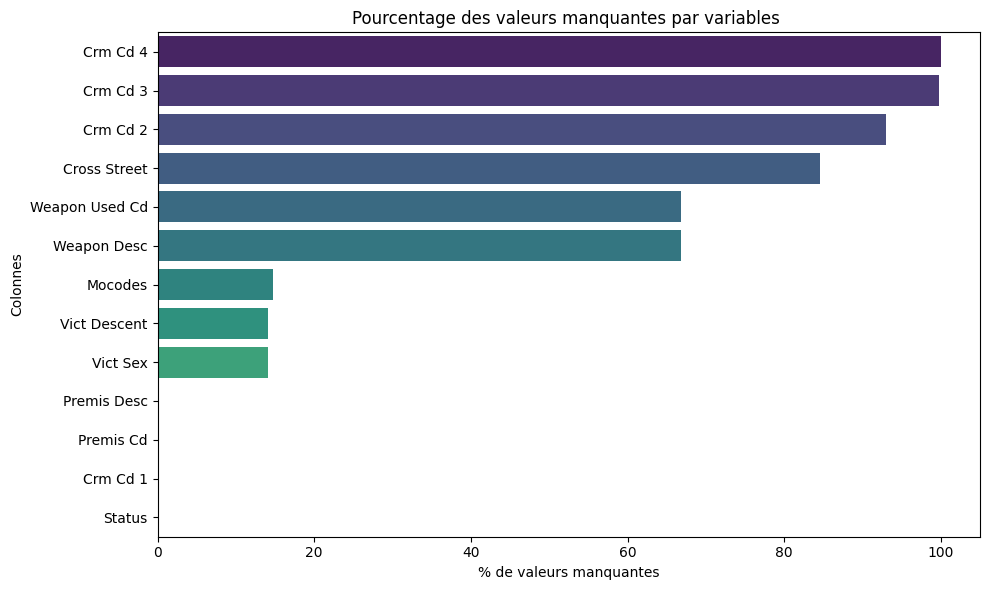

In [42]:
#Visualisation des colonnes touchées 
plt.figure(figsize=(10,6))
sns.barplot(data=missing,
            x="Frequence Relative",
            y="Variables",
            hue="Variables",
            palette="viridis")
plt.title("Pourcentage des valeurs manquantes par variables ")
plt.xlabel("% de valeurs manquantes")
plt.ylabel("Colonnes")
plt.tight_layout()
plt.show()

les Variables les plus touchées:
-Crm Cd 4 99,99% presque jamais renseignées 
-Crm Cd 3 99,76% très rarement utilisée
Crm Cd 2 92,99% elle est renseignée seulement pour certains incidents 
-Cross Street 84,55% Rue croisée rarement enregistrée 
-Weapon Used Cd / Weapon Desc environ 66,8% chacune souvent manquant pour les crimes non violents

### B- Illustrons la matrice des valeurs manquantes grâce à missingno 


<Figure size 1200x500 with 0 Axes>

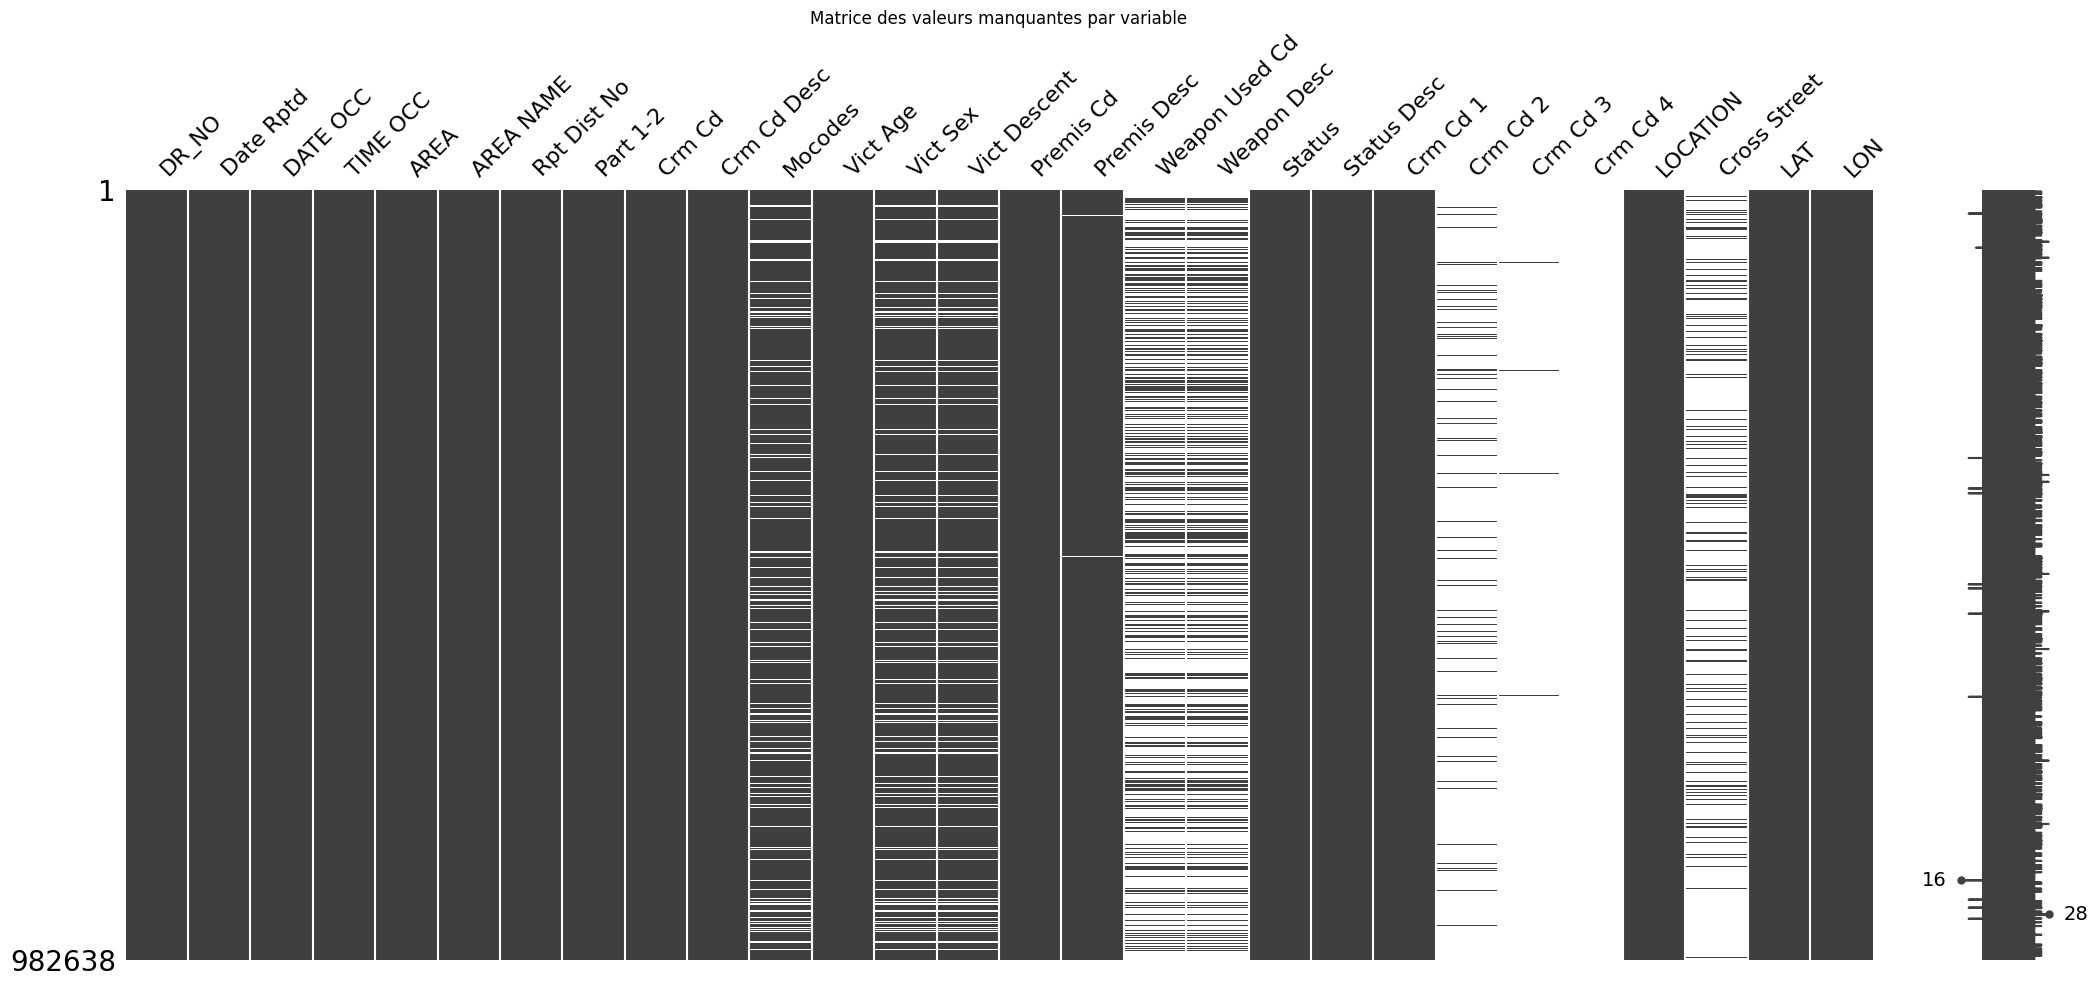

In [46]:
plt.figure(figsize=(12,5))
mso.matrix(df)
plt.title("Matrice des valeurs manquantes par variable")
plt.show()

Cette Matrice montre: 
-Les zones verticales nettes : colonnes souvent entièrement renseignées ou entièrement vide; 
-les blocs Weapon Used Cd et Weapon Desc manquent toujours ensembles : ils sembles être corrélés
-Crm Cd 2,3 et 4 sont presque toujours manquantes en même temps on peut conclure que ces valeurs manquantes semblent être MAR elle pouraient être liées à la nature du crime ou simplement au processus d'enregistrement.
-Vict sex, Vict Descent et Mocodes semblent manquer ensemble ainsi il  

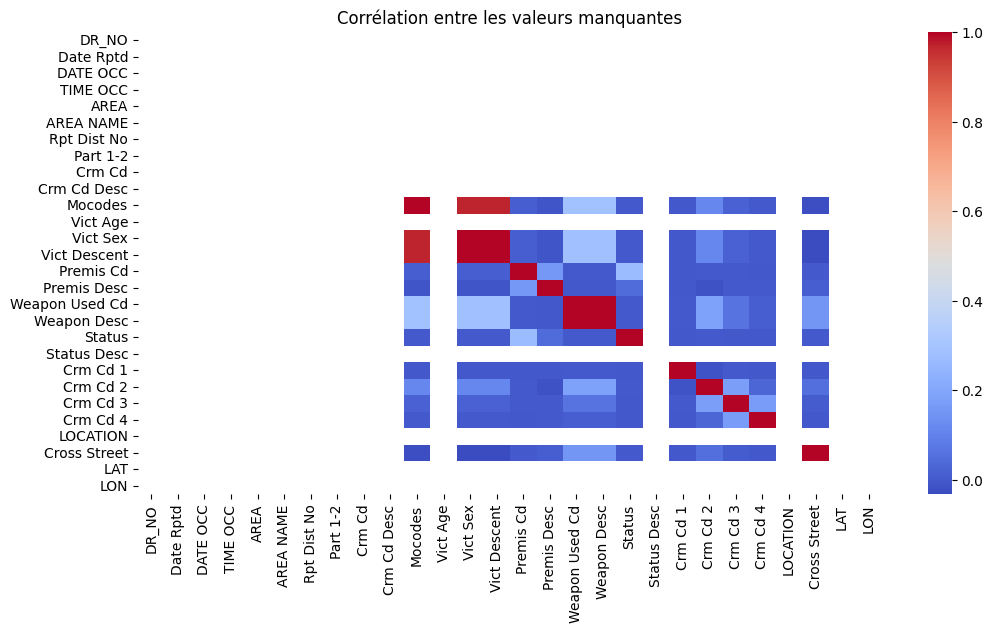

In [50]:
#Corrélation entre les colonnes manquantes
missing_corr=df.isna().corr()
plt.figure(figsize=(12,6))
sns.heatmap(missing_corr,cmap="coolwarm")

#mso.heatmap(df.isna())
plt.title("Corrélation entre les valeurs manquantes")
plt.show()


### Corrélation entre les valeurs manquantes: 
La matrice de corrélation confirme 
-forte corrélation (r=1) entre Weapon Used Cd et Weapon Desc, 
-forte corrélation entre Crm Cd 2-3-4
-Cross Street semble ne pas avoir de lien avec d'autre variables (non MCAR)
Interprétation: 
-Les armes ne sont notées que lorsqu'un crime violent est commis
-Crm Cd 2-4 décrivent des infractions supplémentaires: elles manquent logiquement dans la majorité des incidents simples
-Possibilité de MAR ( Vict Sex, Vict Descent)


### Éffectuons les test bivariés d'independance entre les variables ayant des valeurs manquantes 
### et celles qui n'en contient pas 

In [55]:
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

def audit_mcar_by_variable(df, alpha=0.05):
    results = {}
    for col in df.columns:
        if df[col].isnull().sum() == 0:
            continue  # sauter car variable entièrement renseignée

        missing_mask = df[col].isnull().astype(int)
        associations = []

        for other in df.columns:
            if other == col or df[other].isnull().sum() > 0:
                continue  # sauter la colonne deja choisie et les colonnes ayant des valeurs manquantes 

            if df[other].dtype == 'object' or df[other].nunique() < 10:
                # test categoriel de chi deux
                contingency = pd.crosstab(missing_mask, df[other])
                stat, p, _, _ = chi2_contingency(contingency)
            else:
                # ttest
                group0 = df[other][missing_mask == 0]
                group1 = df[other][missing_mask == 1]
                stat, p = ttest_ind(group0, group1, nan_policy='omit')

            associations.append((other, p))

        # Résumé
        mcar_flag = all(p > alpha for _, p in associations)
        results[col] = {
            'is_MCAR': mcar_flag,
            'associations': associations
        }

    return results

audit=audit_mcar_by_variable(df,alpha=0.05)
for var, info in audit.items():
    print(f"{var }: {"MCAR confirmé " if info["is_MCAR"] else "Not MCAR "}")
    for assoc_var, p in info["associations"]:
        print(f"Assoc.with {assoc_var }: p={p:.4f}")

Mocodes: Not MCAR 
Assoc.with DR_NO: p=0.0000
Assoc.with Date Rptd: p=0.0000
Assoc.with DATE OCC: p=0.0000
Assoc.with TIME OCC: p=0.0000
Assoc.with AREA: p=0.0000
Assoc.with AREA NAME: p=0.0000
Assoc.with Rpt Dist No: p=0.0000
Assoc.with Part 1-2: p=0.0000
Assoc.with Crm Cd: p=0.0000
Assoc.with Crm Cd Desc: p=0.0000
Assoc.with Vict Age: p=0.0000
Assoc.with Status Desc: p=0.0000
Assoc.with LOCATION: p=0.0000
Assoc.with LAT: p=0.0000
Assoc.with LON: p=0.0000
Vict Sex: Not MCAR 
Assoc.with DR_NO: p=0.0000
Assoc.with Date Rptd: p=0.0000
Assoc.with DATE OCC: p=0.0000
Assoc.with TIME OCC: p=0.0000
Assoc.with AREA: p=0.0000
Assoc.with AREA NAME: p=0.0000
Assoc.with Rpt Dist No: p=0.0000
Assoc.with Part 1-2: p=0.0000
Assoc.with Crm Cd: p=0.0000
Assoc.with Crm Cd Desc: p=0.0000
Assoc.with Vict Age: p=0.0000
Assoc.with Status Desc: p=0.0000
Assoc.with LOCATION: p=0.0000
Assoc.with LAT: p=0.0000
Assoc.with LON: p=0.0000
Vict Descent: Not MCAR 
Assoc.with DR_NO: p=0.0000
Assoc.with Date Rptd: p=0.

Il en ressort qu'effectivement nos variables ayant des valeurs manquantes à l'instar de vict Sex dependent généralement du type 
de crime enregistré il est donc normal d'avoir de valeur manquante pour la colonne vict sex pour crime mineur tel que un vandalisme ou un vol à l'épicerie. 

### V Identification des doublons 

In [57]:
print(20* "*" +" DOUBLONS"+20 *"*")
#doublons complets 
complete_duplicates=df.duplicated().sum() 
print(f"Doublons complets :{complete_duplicates}")
#Vérifions si la colonne DR_NO possède des doublons 
DR_duplicate=df.duplicated(subset=["DR_NO"]).sum()
print(f"Doublons DR_NO: {DR_duplicate}")

******************** DOUBLONS********************
Doublons complets :0
Doublons DR_NO: 0


#### Vérification des incoherences

In [59]:
#Vérifions s'il existe des âges négatifs ou suprieurs à 120 
age_incoherent=df[(df["Vict Age"]<=0)| (df["Vict Age"]>120)]
nb_age_incoherent=age_incoherent.shape[0]
#Compter le nombre de time mal incoherente negatif ou superieur à 2359
time_invalide=df[(df["TIME OCC"])<0|(df["TIME OCC"]>2359)]
nb_time_invalide=time_invalide.shape[0]
summary={
    "Âges incohérentes": nb_age_incoherent,
    "Heures incohérentes":nb_time_invalide,
    "Doublons DR_NO":DR_duplicate
}
print(summary)
pourcentage_age_incoherent=nb_age_incoherent*100/df[["Vict Age"]].shape[0]
print(f"le pourcentage d'âge impossible est: {pourcentage_age_incoherent}")


{'Âges incohérentes': 259732, 'Heures incohérentes': 0, 'Doublons DR_NO': 0}
le pourcentage d'âge impossible est: 26.4321143696865


Globalement, le dataset est très propre sur les aspects temporels.
Il semblerait que la variables Vict Age possède environ 26% de valeurs incoherentes

#### Valeurs aberrantes

### Méthode basée sur IQR Q1-1.5IQR et Q3+1.5IQR

In [61]:
#Définissons une fonction qui nous permetra de calculer L'IQR de chacune des colonnes numériques 
def outlier_detection(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outlier=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    return outlier

#Applicons cela a nos données numeriques 
numeric_columns=df.select_dtypes(include=[np.number]).columns.tolist()
outlier_summary={}
for col in numeric_columns:
    outlier=outlier_detection(df,col)
    outlier_summary[col]=len(outlier)
    #print(f"Outliers dans {col }: {len(outlier)}")
outlier_summary_sorted=dict(sorted(outlier_summary.items(), key=lambda x: x[1],reverse=True))
outlier_summary_sorted
                            
 

{'Weapon Used Cd': 40502,
 'LAT': 30257,
 'Crm Cd 2': 13773,
 'LON': 2291,
 'Crm Cd 3': 271,
 'Crm Cd 4': 8,
 'DR_NO': 6,
 'Vict Age': 1,
 'TIME OCC': 0,
 'AREA': 0,
 'Rpt Dist No': 0,
 'Part 1-2': 0,
 'Crm Cd': 0,
 'Premis Cd': 0,
 'Crm Cd 1': 0}

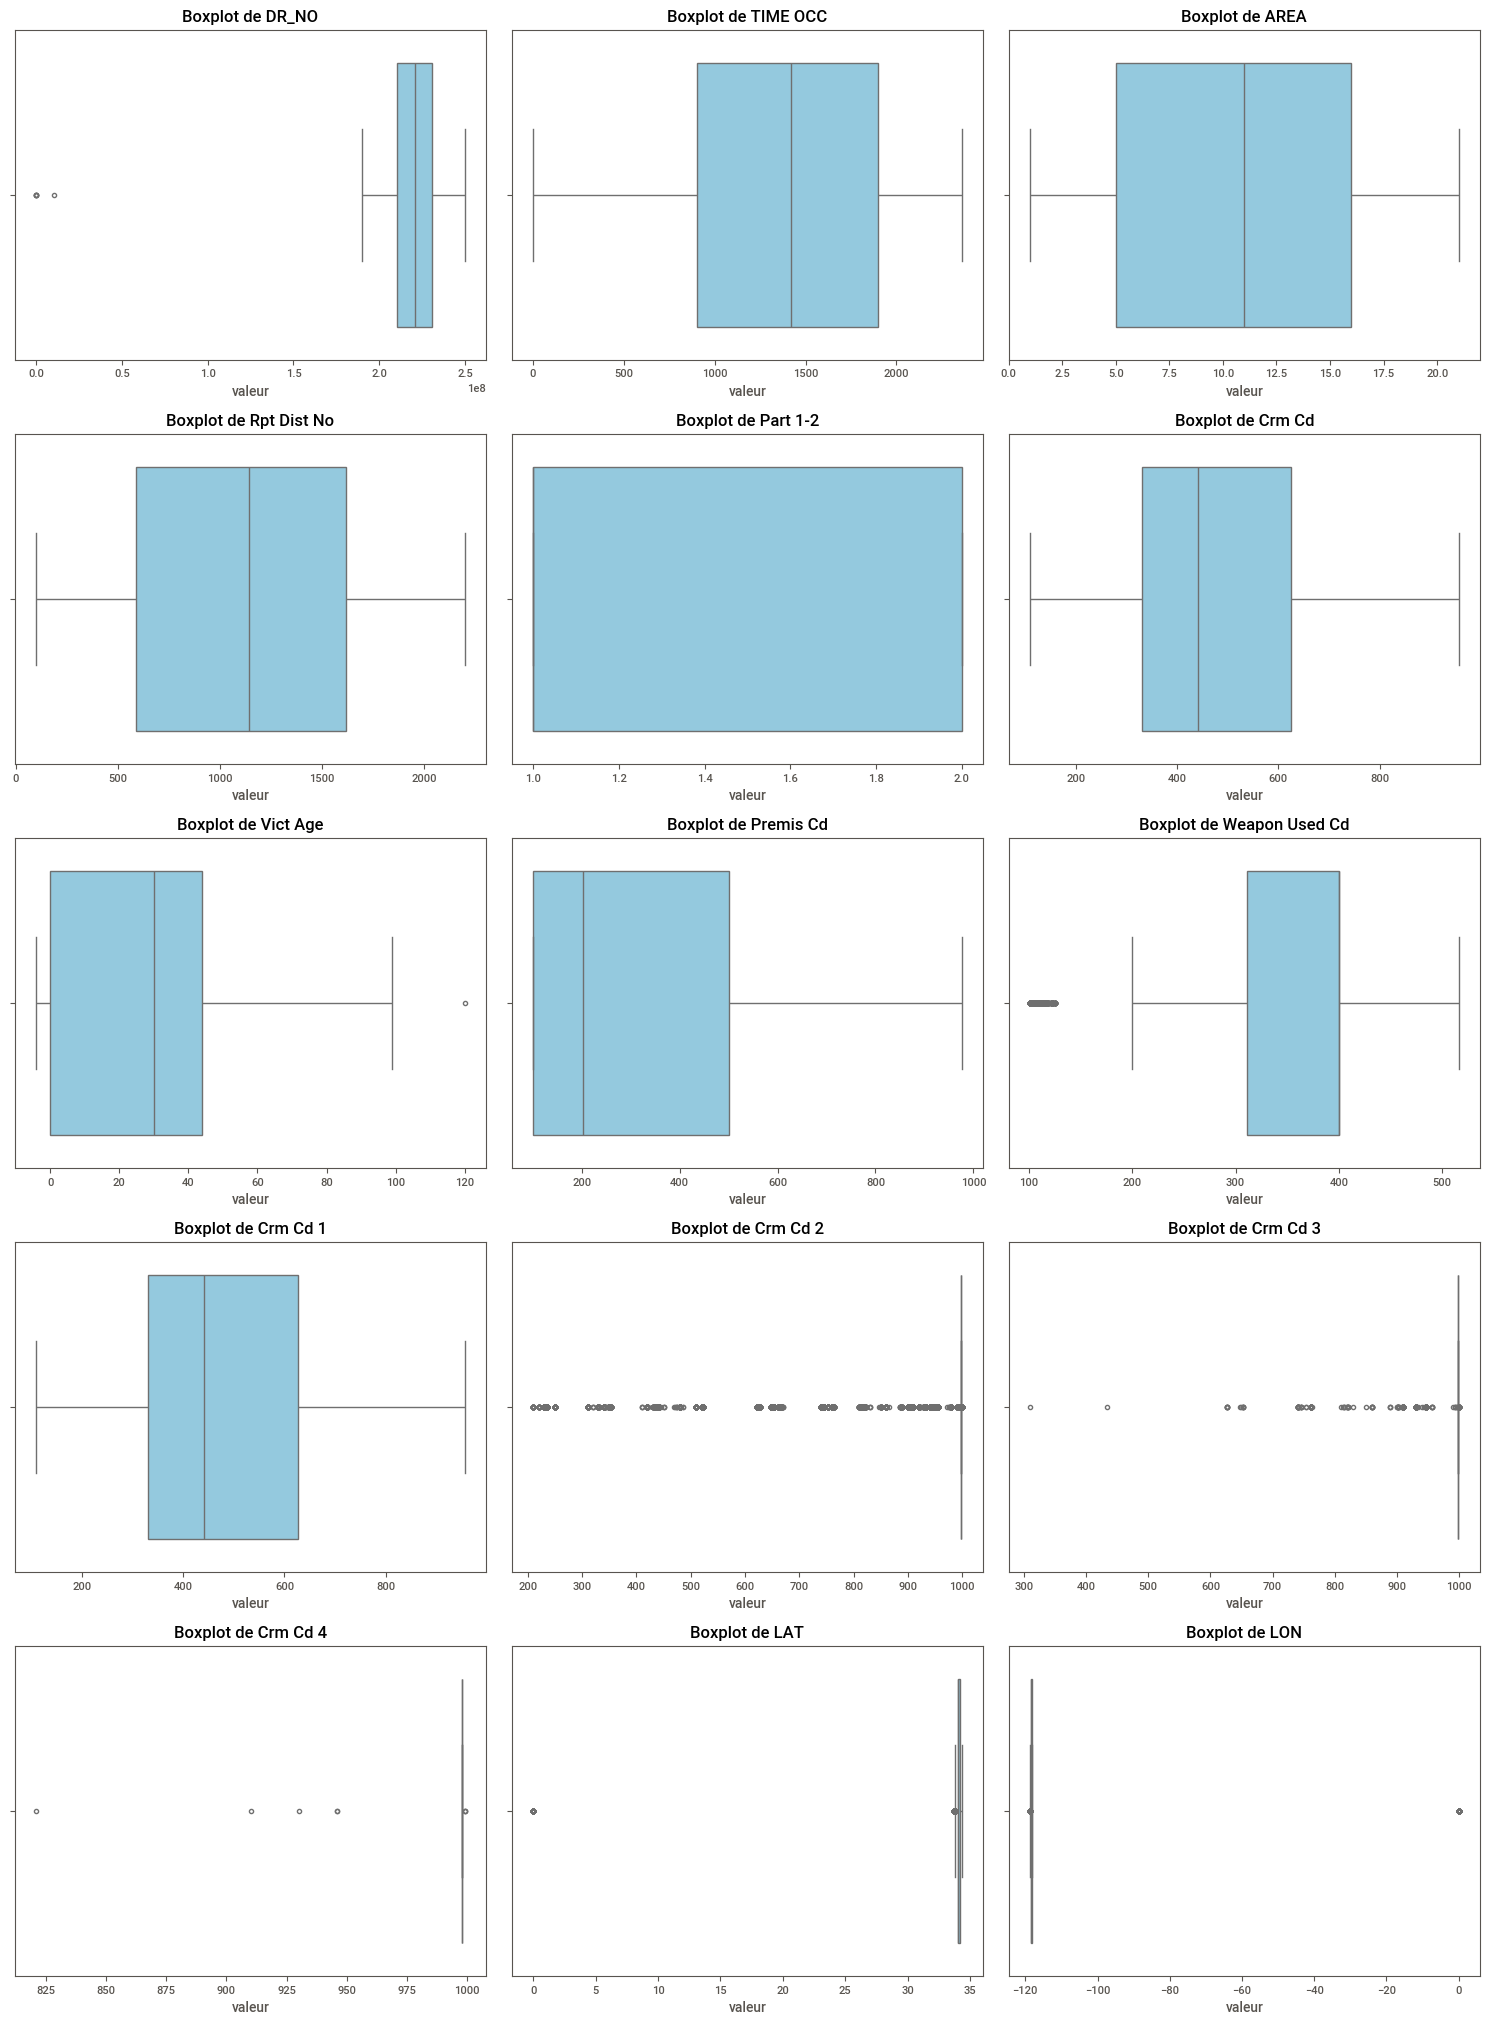

In [345]:
#Visualisation: Boxplots de toutes les variables numériques 
fig, axes = plt.subplots(nrows=len(numeric_columns)//3 + 1, ncols=3, figsize=(15, 4*(len(numeric_columns)//3 + 1)))
axes=axes.flatten()
for i, col in enumerate (numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_xlabel("valeur")
#suppression des cases vides inutilisées
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


#### NETTOYAGE  DES DONNÉES 

#### I Gestion des erreurs de formatage de date et heure 

In [183]:
# Supprimons les espaces pontentiels qui existerait avant et aprés une variables 
df.columns.str.strip()

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [195]:
#Conversion de variables DATE OCC et Date Rptd
date=['Date Rptd','DATE OCC']
for element in date:
    df[element]=pd.to_datetime(df[element], format="mixed",dayfirst=True,errors="coerce" ) 
df.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-01-03,2020-01-03,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-09-02,2020-08-02,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020-04-11,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002


In [197]:
#verifions s'il y a eu des erreurs de conversion introduisant des nat dans notre dataset
df[["DATE OCC","Date Rptd"]].isna().sum()

DATE OCC     0
Date Rptd    0
dtype: int64

In [215]:
#Conversion de la colonne time en format datetime :
def conversion_time(x):
    heure=x//100
    minute=x%100
    return f"{heure:02d}{minute:02d}"
df["New Time"]=df["TIME OCC"].apply(conversion_time)
df.head(50)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,New Time
0,190326475,2020-01-03,2020-01-03,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2130
1,200106753,2020-09-02,2020-08-02,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,1800
2,200320258,2020-11-11,2020-04-11,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,1700
3,200907217,2023-10-05,2020-10-03,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2037
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,1200
5,231808869,2023-04-04,2020-01-12,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463,2300
6,230110144,2023-04-04,2020-03-07,900,1,Central,182,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620,0900
7,220314085,2022-07-22,2020-12-05,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537,1110
8,231309864,2023-04-28,2020-09-12,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521,1400
9,211904005,2020-12-31,2020-12-31,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535,1220


In [217]:
#Conversion de New Time en format datetime pour nos futurs exploitations 
df["TIME OCC"]=(pd.to_datetime(df["New Time"], format="%H%M", errors="coerce")).dt.time
df.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,New Time
0,190326475,2020-01-03,2020-01-03,21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2130
1,200106753,2020-09-02,2020-08-02,18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,1800
2,200320258,2020-11-11,2020-04-11,17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,...,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,1700


In [227]:
#Verifions si la conversion n'a pas engendré de nouvelles valeurs manquantes 
df["TIME OCC"].isna().sum()

0

### II Gestion des valeurs manquantes 

In [230]:
#imputation des valeurs manquantes de vict Sex par Unknown 
df["Vict Sex"]=df["Vict Sex"].fillna("Unknown")
#Imputation de vict Descent par "Unknown"
df["Vict Descent"]=df["Vict Descent"].fillna("Unknown")
#imputation de weapon Used Cd par "Inconue"
df['Weapon Used Cd']=df['Weapon Used Cd'].fillna(-1)  # -1 ici signifie non renseigné
'Weapon Desc'
df['Weapon Desc']=df['Weapon Desc'].fillna("Unknown")
#pour la variables Statut on peut supprimer la ligne comportant la valeur manquante car represente moins de 5% de df 

# les Variables Crm Cd 2 à 4 ne presque pas renseigné on les supprimera 
df_clean1=df.drop(columns=['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4','Cross Street'], inplace=False)
df_clean=df_clean1.dropna(axis=0,how="any", subset=["Status",'Crm Cd 1','Premis Cd'], inplace=False)



In [232]:
df_clean.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           145248
Vict Age               0
Vict Sex               0
Vict Descent           0
Premis Cd              0
Premis Desc          571
Weapon Used Cd         0
Weapon Desc            0
Status                 0
Status Desc            0
Crm Cd 1               0
LOCATION               0
LAT                    0
LON                    0
New Time               0
dtype: int64

### III Gestion des valeur incoherente de Age 

In [237]:
df_clean["Vict Age"] = np.where(
    (df_clean["Vict Age"] < 0) | (df_clean["Vict Age"] > 120),
    np.nan,
    df_clean["Vict Age"]
)



C:\Users\brice\AppData\Local\Temp\ipykernel_9348\1361080960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Vict Age"] = np.where(


### Gestion des valeurs aberrantes 

In [242]:
#gestion de la valeur aberrante de variable Vict Age 
Q1=df_clean["Vict Age"].dropna().quantile(0.25)
Q3=df_clean["Vict Age"].dropna().quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df_clean["Vict Age"] = np.where(
    df_clean["Vict Age"] < lower_bound,
    lower_bound,
    np.where(
        df_clean["Vict Age"] > upper_bound,
        upper_bound,
        df_clean["Vict Age"]
    )
)

C:\Users\brice\AppData\Local\Temp\ipykernel_9348\3960794239.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Vict Age"] = np.where(


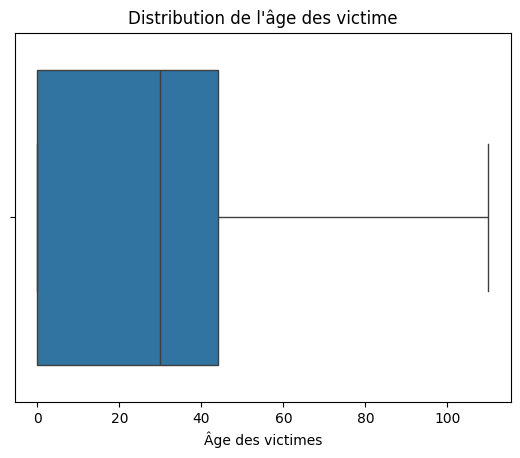

In [246]:
#vérification simple 
sns.boxplot(df_clean,
            x=df_clean["Vict Age"] )
plt.title("Distribution de l'âge des victime")
plt.xlabel("Âge des victimes")
plt.show()

#### TRANSFORMATION DES DONNÉES 

In [250]:
#Creation des nouvelles variables :
df_clean["Years OCC"]=df_clean["DATE OCC"].dt.year
df_clean["Month OCC"]=df_clean["DATE OCC"].dt.month
df_clean["DAY OCC"]=df_clean["DATE OCC"].dt.day
df_clean["WeekDay OCC"]=df_clean["DATE OCC"].dt.day_name()


C:\Users\brice\AppData\Local\Temp\ipykernel_9348\611700998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Years OCC"]=df_clean["DATE OCC"].dt.year
C:\Users\brice\AppData\Local\Temp\ipykernel_9348\611700998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Month OCC"]=df_clean["DATE OCC"].dt.month
C:\Users\brice\AppData\Local\Temp\ipykernel_9348\611700998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [296]:
#Ajoutons une colonne delimitant une journée en trois tranche 
def assign_time(date):
    if pd.isnull(date):
        return None
    hours=date.hour
    if 5<=hours <12:
        return 'Matin'
    elif hours<17:
        return 'Après-Midi'
    elif hours<21:
        return 'Soir'
    else:
        return 'Nuit'
df_clean["Periode_Journée OCC"]=df_clean["TIME OCC"].apply(assign_time)

C:\Users\brice\AppData\Local\Temp\ipykernel_9348\3910202050.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Periode_Journée OCC"]=df_clean["TIME OCC"].apply(assign_time)


In [298]:

#df_clean["Periode_Journée OCC"] = pd.cut(
#    df_clean["TIME OCC"].dt.hour,
#    bins=[0, 5, 12, 17, 21, 24],
#    labels=["Nuit", "Matin", "Après-Midi", "Soir", "Nuit"],
#    right=False,
#    include_lowest=True
#)


In [302]:
df_clean[["Periode_Journée OCC"]].head(20)

,Periode_Journée OCC
0,Nuit
1,Soir
2,Soir
3,Soir
4,Après-Midi
5,Nuit
6,Matin
7,Matin
8,Après-Midi
9,Après-Midi


In [286]:
df_clean.drop(columns=["Periode_Journée OCC"],inplace=True)

C:\Users\brice\AppData\Local\Temp\ipykernel_9348\3202405690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=["Periode_Journée OCC"],inplace=True)


In [292]:
df_clean["TIME OCC"].dtype

dtype('O')

In [308]:
df_clean.head(20)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,New Time,Years OCC,Month OCC,DAY OCC,WeekDay OCC,Periode_Journée OCC
0,190326475,2020-01-03,2020-01-03,21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0.0,M,O,101.0,STREET,-1.0,Unknown,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2130,2020,1,3,Friday,Nuit
1,200106753,2020-09-02,2020-08-02,18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),-1.0,Unknown,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,1800,2020,8,2,Sunday,Soir
2,200320258,2020-11-11,2020-04-11,17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19.0,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",-1.0,Unknown,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,1700,2020,4,11,Saturday,Soir
3,200907217,2023-10-05,2020-10-03,20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,M,O,405.0,CLOTHING STORE,-1.0,Unknown,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,2037,2020,10,3,Saturday,Soir
4,220614831,2022-08-18,2020-08-17,12:00:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28.0,M,H,102.0,SIDEWALK,-1.0,Unknown,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277,1200,2020,8,17,Monday,Après-Midi
5,231808869,2023-04-04,2020-01-12,23:00:00,18,Southeast,1826,2,354,THEFT OF IDENTITY,1822 0100 0930 0929,41.0,M,H,501.0,SINGLE FAMILY DWELLING,-1.0,Unknown,IC,Invest Cont,354.0,9900 COMPTON AV,33.9467,-118.2463,2300,2020,1,12,Sunday,Nuit
6,230110144,2023-04-04,2020-03-07,09:00:00,1,Central,182,2,354,THEFT OF IDENTITY,0930 0929,25.0,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",-1.0,Unknown,IC,Invest Cont,354.0,1100 S GRAND AV,34.0415,-118.2620,0900,2020,3,7,Saturday,Matin
7,220314085,2022-07-22,2020-12-05,11:10:00,3,Southwest,303,2,354,THEFT OF IDENTITY,0100,27.0,F,B,248.0,CELL PHONE STORE,-1.0,Unknown,IC,Invest Cont,354.0,2500 S SYCAMORE AV,34.0335,-118.3537,1110,2020,12,5,Saturday,Matin
8,231309864,2023-04-28,2020-09-12,14:00:00,13,Newton,1375,2,354,THEFT OF IDENTITY,0100,24.0,F,B,750.0,CYBERSPACE,-1.0,Unknown,IC,Invest Cont,354.0,1300 E 57TH ST,33.9911,-118.2521,1400,2020,9,12,Saturday,Après-Midi
9,211904005,2020-12-31,2020-12-31,12:20:00,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,0416,26.0,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,9000 CEDROS AV,34.2336,-118.4535,1220,2020,12,31,Thursday,Après-Midi


In [310]:
df_clean.to_csv("Crime_Data_cleaned.csv", index=False)